In [0]:
import os
import pandas as pd
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.autograd import Variable
%matplotlib inline

In [0]:
# Before laoding dataset, we will define a transform which is used to normalize the data

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

In [0]:
# Load the Dataset from torchvision package:
 
# Training data:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#Test Data:
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Output: Now we have training data loaded into trainloader & test data loaded into valloader


In [4]:
#check out the **shape of the images** and **shape of the labels**:

dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

#Printing the size of one image

print(images[1].numpy().squeeze().shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
(28, 28)


Output: The shape of images are torch.Size([64,1,28,28]), which means that there are 64 images in each batch and each image has a dimension of 28 x 28 pixels. Similarly, the labels have a shape as torch.Size([64]) as 64 images have 64 labels.


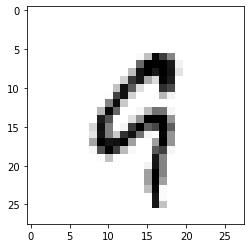

In [5]:
# Looking at the sample image displayed from training dataset:

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

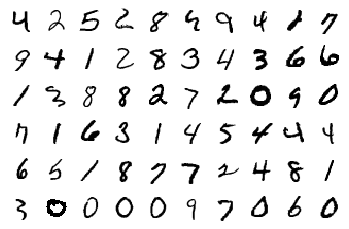

In [6]:
# Similarly displaying more images from training dataset:

figure = plt.figure()
for index in range(1, 61, 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
# To get *Number of input features*

inputs=images.view(images.shape[0],-1)
n_input=inputs.shape[1]

print("Shape of the input features:",n_input)

Shape of the input features: 784


## We will building the Neural Network Model using **nn module** from PyTorch which contain three layers.
## 1. an input layer, 2. an output layer and 3. an hidden layer.


In [9]:
# Hyperparameters for our network

#### - Using Sigmoid - Non Linear Activation for hidden Layers

input_size = 784
hidden_sizes = [128,64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [10]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0197,  0.0007,  0.0095,  ...,  0.0152,  0.0288, -0.0010],
        [ 0.0048, -0.0356,  0.0128,  ..., -0.0348, -0.0280, -0.0244],
        [ 0.0154, -0.0340, -0.0159,  ..., -0.0102, -0.0127, -0.0243],
        ...,
        [-0.0010, -0.0132, -0.0336,  ...,  0.0240, -0.0086,  0.0215],
        [ 0.0262,  0.0138,  0.0354,  ..., -0.0336, -0.0211,  0.0144],
        [-0.0201,  0.0007, -0.0072,  ...,  0.0340,  0.0144,  0.0192]],
       requires_grad=True)

In [11]:
# Getting our data
images, labels = next(iter(trainloader))

# Flatten Images
images = images.view(images.shape[0],-1)

# Forward pass, to get our logits
logits = model(images)  #log probabilites
print(logits.shape)

torch.Size([64, 10])


In [12]:
# Define a Loss Function
criterion = nn.NLLLoss()

# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)
print(loss)

tensor(2.3122, grad_fn=<NllLossBackward>)


In [13]:
model.parameters()

<generator object Module.parameters at 0x7fbf40912fc0>

In [14]:
## Creating a Neural Network model using **nn.Sequential**
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

# Loading images from training data into the above model & getting logits of the model(as we are using *LogSoftmax* as ouptut)
images, labels = next(iter(trainloader))
images =images.view(images.shape[0],-1)

logits = model(images)

# Calcluating loss 
criterion = nn.NLLLoss()
loss = criterion(logits, labels)

print('Before backward pass: \n', model[0].weight.grad)

loss.backward()   #This computes the derivative of the loss with respect to the parameters using back propogation

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [-0.0036, -0.0036, -0.0036,  ..., -0.0036, -0.0036, -0.0036],
        ...,
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [ 0.0065,  0.0065,  0.0065,  ...,  0.0065,  0.0065,  0.0065]])


In [15]:
## Defining the Optimizer: We will be using SGD Optimizer for this model.

optimizer = optim.SGD(model.parameters(), lr=0.003,momentum=0.9)   ## Learning Rate is 0.0003 for this optimizer

epochs = []
train_losses = []
test_losses = []
epoch = 7

for e in range(epoch):
    runningloss = 0
    for images, labels in trainloader:
        
        #Flatten the images
        images = images.view(images.shape[0],-1)
        
        #Training pass
        optimizer.zero_grad()  # This clears the old gradients from the last step
        
        logits = model(images)
        
        #loss calculation
        loss = criterion(logits,labels)
        
        # Loss calculation using back propogation
        loss.backward()
        
        optimizer.step()  # Optimizer take a step absed on gradients of the parameters
        
        runningloss += loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in valloader:
                
                #Flatten the images
                images = images.view(images.shape[0],-1)
                log_ps=model(images)
                
                # Calculating loss of the test data
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                
                #Calculating accuracy of the model
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
                
        model.train()
        train_losses.append(runningloss/len(valloader))
        test_losses.append(test_loss/len(valloader))
        
        print("Epoch: {}/{}.. ".format(e+1, epoch),
              "Training Loss: {:.3f}.. ".format(runningloss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(valloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(valloader)))

Epoch: 1/7..  Training Loss: 0.666..  Test Loss: 0.302..  Test Accuracy: 0.911
Epoch: 2/7..  Training Loss: 0.283..  Test Loss: 0.234..  Test Accuracy: 0.931
Epoch: 3/7..  Training Loss: 0.220..  Test Loss: 0.200..  Test Accuracy: 0.939
Epoch: 4/7..  Training Loss: 0.175..  Test Loss: 0.157..  Test Accuracy: 0.952
Epoch: 5/7..  Training Loss: 0.148..  Test Loss: 0.140..  Test Accuracy: 0.958
Epoch: 6/7..  Training Loss: 0.129..  Test Loss: 0.122..  Test Accuracy: 0.964
Epoch: 7/7..  Training Loss: 0.113..  Test Loss: 0.113..  Test Accuracy: 0.966


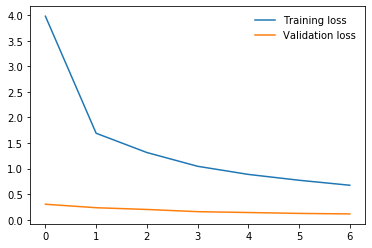

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [18]:
# Using for loop, iterating the validation data & calculating the no. of correct predictions.
# By this we can get overall Accuracy of the model

# Initializing two new variables - Correct_count and all_count
correct_count, all_count = 0, 0

for images,labels in valloader:
    for i in range(len(labels)):
        
        # Convert 2D image to 1D vector
        img = images[i].view(1, 784)
    
    # Calculate the class probabilities (softmax) for img
    with torch.no_grad():
        logits = model(img)

    ps = torch.exp(logits)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    
    # Checking if the label is correctly predicted or not
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 157

Model Accuracy = 0.9426751592356688
